In [67]:
import numpy as np
import pandas as pd
import time

In [68]:
# !pip install kaggle kagglehub

In [69]:
# import kagglehub
# import kagglehub.datasets

# # Download latest version
# kaggle_file_path = kagglehub.dataset_download("akram24/social-network-ads")

# print("Path to dataset files:", kaggle_file_path)

In [70]:
# df = pd.read_csv(kaggle_file_path + '/Social_Network_Ads.csv')
df = pd.read_csv('Data/Social_Network_Ads.csv')

In [71]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [72]:
df = df[['Age','EstimatedSalary','Purchased']]

In [73]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [74]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [75]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [77]:
X_scaled.shape

(400, 2)

In [78]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:
#X_train.shape

In [80]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [81]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/anaconda3/envs/llm/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [83]:
X_scaled.shape

(400, 2)

**Condition in batch_size**
* If batch_size = 1 -> stochastic GD
* If batch_size = n(no. of rows in data) -> Batch GD


#### Batch GD

In [92]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history_batch = model.fit(X_scaled,y,epochs=500,batch_size=400,validation_split=0.2)
print("Batch GD\nEpochs used: ",len(history_batch.epoch),"\nTime Taken: ",time.time() - start)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step - accuracy: 0.8875 - loss: 0.2602 - val_accuracy: 0.9625 - val_loss: 0.2842
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8875 - loss: 0.2590 - val_accuracy: 0.9750 - val_loss: 0.2849
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8906 - loss: 0.2582 - val_accuracy: 0.9750 - val_loss: 0.2853
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8906 - loss: 0.2576 - val_accuracy: 0.9750 - val_loss: 0.2856
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8875 - loss: 0.2570 - val_accuracy: 0.9750 - val_loss: 0.2858
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8875 - loss: 0.2565 - val_accuracy: 0.9750 - val_loss: 0.2859
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8844 - loss: 0.2561 - val_accuracy: 0.9750 - val_loss: 0.2858
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8844 - loss: 0.2557 - val_accuracy: 0.9750 - val_loss

Text(0.5, 1.0, 'Model Loss Batch GD')

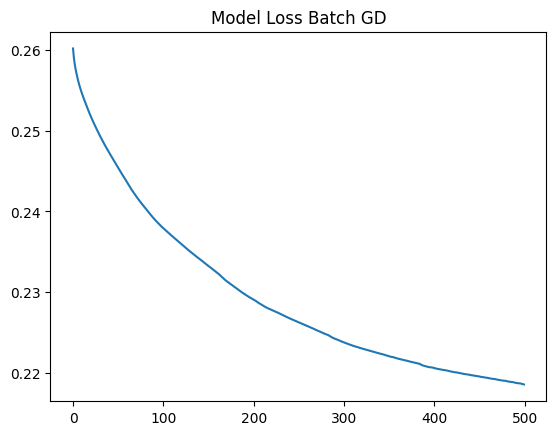

In [93]:
import matplotlib.pyplot as plt
plt.plot(history_batch.history['loss'])
plt.title("Model Loss Batch GD")

#### Stochastic GD

In [86]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [87]:
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history_stochastic = model.fit(X_scaled,y,epochs=10,batch_size=1,validation_split=0.2)
print("Stochastic GD\nEpochs used: ",len(history_stochastic.epoch),"\nTime Taken: ",time.time() - start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7682 - loss: 0.5516 - val_accuracy: 0.4000 - val_loss: 0.7077
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7666 - loss: 0.3740 - val_accuracy: 0.5375 - val_loss: 0.6493
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8051 - loss: 0.3651 - val_accuracy: 0.6875 - val_loss: 0.5798
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8454 - loss: 0.3125 - val_accuracy: 0.8000 - val_loss: 0.5031
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9036 - loss: 0.2640 - val_accuracy: 0.8625 - val_loss: 0.4331
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8606 - loss: 0.3024 - val_accuracy: 0.9125 - val_loss: 0.3872
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8580 - loss: 0.3187 - val_accuracy: 0.9375 - val_loss: 0.3539
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8696 - loss: 0.3027 - val_accuracy: 0.

Text(0.5, 1.0, 'Model Loss Stochastic GD')

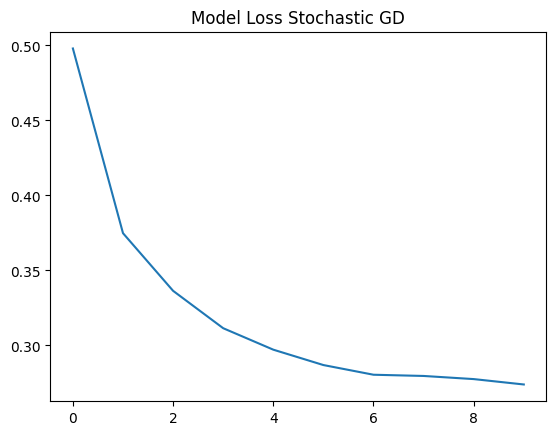

In [88]:
plt.plot(history_stochastic.history['loss'])
plt.title('Model Loss Stochastic GD')